In [16]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train / 255 
x_test = x_test / 255 

In [4]:
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(800, input_dim=784, activation='relu'),
    Dense(10, activation='softmax'),                    
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=5,
    batch_size=450,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
107/107 [==============================] - 1s 13ms/step - loss: 0.5707 - accuracy: 0.8164 - val_loss: 0.5653 - val_accuracy: 0.8161
Epoch 2/5
107/107 [==============================] - 1s 14ms/step - loss: 0.5595 - accuracy: 0.8199 - val_loss: 0.5551 - val_accuracy: 0.8188
Epoch 3/5
107/107 [==============================] - 1s 13ms/step - loss: 0.5498 - accuracy: 0.8203 - val_loss: 0.5480 - val_accuracy: 0.8197
Epoch 4/5
107/107 [==============================] - 1s 13ms/step - loss: 0.5410 - accuracy: 0.8237 - val_loss: 0.5390 - val_accuracy: 0.8215
Epoch 5/5
107/107 [==============================] - 1s 13ms/step - loss: 0.5331 - accuracy: 0.8256 - val_loss: 0.5322 - val_accuracy: 0.8245


In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


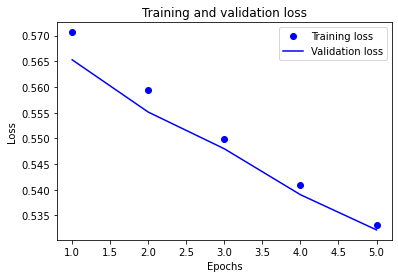

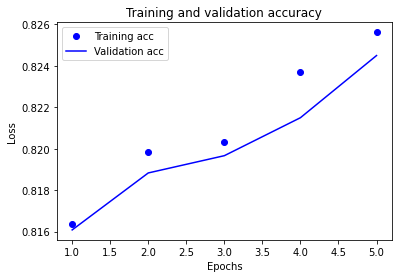

In [14]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Висновок: точність в відсотках:", round(scores[1] * 100, 2))

313/313 [==============================] - 1s 4ms/step - loss: 0.5524 - accuracy: 0.8149
Висновок: точність в відсотках: 81.49
